
# Projeto 1 - Redes Sociais

## Criação de Modelos

## Alunos

<table>
  <tr>
    <td align="center"><a href="https://github.com/DaviReisVieira"><img style="border-radius: 50%;" src="https://github.com/DaviReisVieira.png" width="100px;" alt=""/><br /><sub><b>Davi Reis Vieira</b></sub></a><br /><a href="https://github.com/DaviReisVieira" title="Davi Reis Vieira">O Cara -1</a></td>
    <td align="center"><a href="https://github.com/guishas"><img style="border-radius: 50%;" src="https://github.com/guishas.png" width="100px;" alt=""/><br /><sub><b>Guilherme Lunetta</b></sub></a><br /><a href="https://github.com/guishas" title="Guilherme Lunetta">O cara 0</a></td>
    <td align="center"><a href="https://github.com/josermf2"><img style="border-radius: 50%;" src="https://github.com/josermf2.png" width="100px;" alt=""/><br /><sub><b>José Fernandes</b></sub></a><br /><a href="https://github.com/josermf2" title="José Fernandes">O cara +1</a></td>
  </tr>
</table>

## Importando o dataset

- Importando bibliotecas

In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('reviews_july.csv')
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,True,0,0,...,True,False,False,76561198074616040,148,12,29259.0,0.0,18588.0,1.597875e+09
1,292030,The Witcher 3: Wild Hunt,73576952,brazilian,Não tenho palavras para dizer como esse jogo e...,2020-07-31 20:46:46,2020-07-31 20:48:04,True,1,0,...,True,False,False,76561198120075031,38,9,4389.0,0.0,4389.0,1.557089e+09
2,292030,The Witcher 3: Wild Hunt,73575959,brazilian,Epic,2020-07-31 20:17:38,2020-07-31 20:17:38,True,0,0,...,True,False,False,76561198101494872,25,1,6653.0,0.0,4136.0,1.608502e+09
3,292030,The Witcher 3: Wild Hunt,73575666,brazilian,"Melhor jogo do fucking universo, compre isso e...",2020-07-31 20:09:24,2020-07-31 20:09:24,True,1,0,...,True,False,False,76561198032616918,80,2,24894.0,0.0,18568.0,1.608581e+09
4,292030,The Witcher 3: Wild Hunt,73574848,brazilian,Um dos melhores games já feito.,2020-07-31 19:45:16,2020-07-31 19:45:16,True,1,0,...,True,False,False,76561198276339634,37,4,7796.0,0.0,7755.0,1.596227e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  bool   
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

## Tratando os dados

In [4]:
df.columns = df.columns.str.replace('.', '_')

/tmp/ipykernel_12/2262415099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


- Convertendo a coluna `recommended` para inteiro

In [5]:
df['recommended'] = df['recommended'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          80068 non-null  int64  
 1   app_name                        80068 non-null  object 
 2   review_id                       80068 non-null  int64  
 3   language                        80068 non-null  object 
 4   review                          80025 non-null  object 
 5   timestamp_created               80068 non-null  object 
 6   timestamp_updated               80068 non-null  object 
 7   recommended                     80068 non-null  int64  
 8   votes_helpful                   80068 non-null  int64  
 9   votes_funny                     80068 non-null  int64  
 10  weighted_vote_score             80068 non-null  float64
 11  comment_count                   80068 non-null  int64  
 12  steam_purchase                  

## Criando a variável de controle `Nível de Positividade por Usuário`

In [7]:
df['level_of_positivite'] = df.groupby('author_steamid')['recommended'].transform(lambda x: x.sum() / x.count())

<AxesSubplot: >

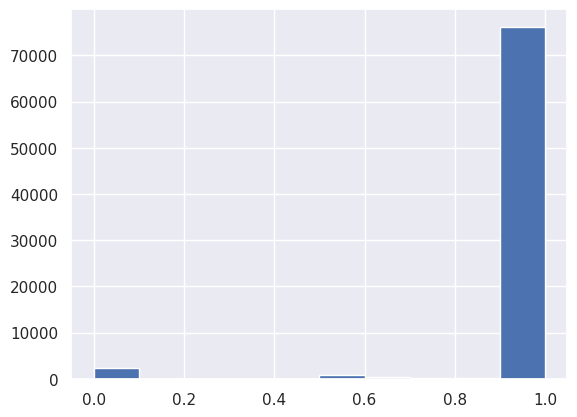

In [57]:
df['level_of_positivite'].hist()

## Carregando a rede criada previamente

In [8]:
import netpixi

from netpixi.integration.gt import *
from regression.integration.gt import *

g = gt_load('reviews_july.net.gz')

# p = gt_draw.sfdp_layout(g)
# gt_move(g, p)
# gt_save(g, 'reviews_july_render.net.gz')
r = netpixi.render('reviews_july_render.net.gz')

/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:4: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name + "_r", _cmap_r)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


## Criando métricas de rede Centro-Periferia

Para identificar centro e periferia de um grafo, podemos usar a biblioteca [cpnet](https://github.com/skojaku/core-periphery-detection) em conjunto com o módulo spectral da graph_tool.

In [9]:
import cpnet

from graph_tool import spectral

In [10]:
matrix = spectral.adjacency(g)

In [11]:
algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [12]:
g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

In [13]:
for v in g.all_vertices():
    r.vertex(v['id'], size=(5 + 20 * v['coreness']))

- Função para criar métrica `Centro-periferia`

In [14]:
df_copy = df.copy()

In [15]:
data = gt_data(g)
data = data[['coreness']]
data

,coreness
id,
76561197961125336,0.101767
76561198113760204,0.186746
76561198170383927,0.195030
76561198294691999,0.249671
76561198847794289,0.221418
...,...
76561198833339209,0.046138
76561199063233814,0.044876
76561198978646127,0.032423


In [4]:
data_df = pd.DataFrame(data)
data_df = df_copy.merge(data, left_on=['author_steamid'],right_on=['id'])
data_df

NameError: name 'pd' is not defined

In [17]:
data_df['periphery'] = 1- data_df['coreness']

In [18]:
data_df.to_csv('reviews_july_with_coreness.csv', index=False)

------------------

## Realizando as regressões e salvando os resultados

In [7]:
import regression as reg

ModuleNotFoundError: No module named 'regression'

In [2]:
data_df = pd.read_csv('reviews_july_with_coreness.csv')
data_df.head()

NameError: name 'pd' is not defined

In [3]:
data_df.info()

NameError: name 'data_df' is not defined

In [183]:
def float_to_int(value):
    if value < 0.5:
        return 0
    else:
        return 1
    
data_df['coreness'] = data_df['coreness'].apply(float_to_int)
data_df['periphery'] = data_df['periphery'].apply(float_to_int)
data_df['author_playtime_forever'] = data_df['author_playtime_forever'].astype(int)

In [184]:
data_df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness,periphery
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,1,0,0,...,76561198074616040,148,12,29259,0.0,18588.0,1.597875e+09,1.0,0,1
1,268500,XCOM 2,73193028,brazilian,"While i did not play the Vanilla game, War of ...",2020-07-24 04:42:09,2020-07-24 04:42:09,1,0,0,...,76561198074616040,148,12,9464,0.0,9251.0,1.596595e+09,1.0,0,1
2,292030,The Witcher 3: Wild Hunt,73557216,brazilian,A Mona Lisa dos jogos.,2020-07-31 11:41:40,2020-07-31 11:41:40,1,1,0,...,76561198140909430,75,14,25779,0.0,25779.0,1.592863e+09,1.0,1,0
3,381210,Dead by Daylight,73557284,brazilian,"Bom demais. ""Depois de um tempo você para de l...",2020-07-31 11:43:25,2020-07-31 11:43:25,1,1,0,...,76561198140909430,74,14,21709,41.0,16187.0,1.610659e+09,1.0,1,0
4,242760,The Forest,73557449,brazilian,Um dos melhores jogos de sobrevivência que jog...,2020-07-31 11:49:38,2020-07-31 11:49:38,1,0,0,...,76561198140909430,74,14,11086,0.0,11086.0,1.574923e+09,1.0,1,0


In [185]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14232 entries, 0 to 14231
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          14232 non-null  int64  
 1   app_name                        14232 non-null  object 
 2   review_id                       14232 non-null  int64  
 3   language                        14232 non-null  object 
 4   review                          14222 non-null  object 
 5   timestamp_created               14232 non-null  object 
 6   timestamp_updated               14232 non-null  object 
 7   recommended                     14232 non-null  int64  
 8   votes_helpful                   14232 non-null  int64  
 9   votes_funny                     14232 non-null  int64  
 10  weighted_vote_score             14232 non-null  float64
 11  comment_count                   14232 non-null  int64  
 12  steam_purchase                  

In [186]:
results_a = reg.logistic(data=data_df, formula='recommended ~ author_playtime_forever')
results_a.micro_summary()

Optimization terminated successfully.
         Current function value: 0.164666
         Iterations 7


variable,coefficient,std error,p-value
author_playtime_forever,-0.000003,0.000002,0.113584


83.33% of average residuals inside


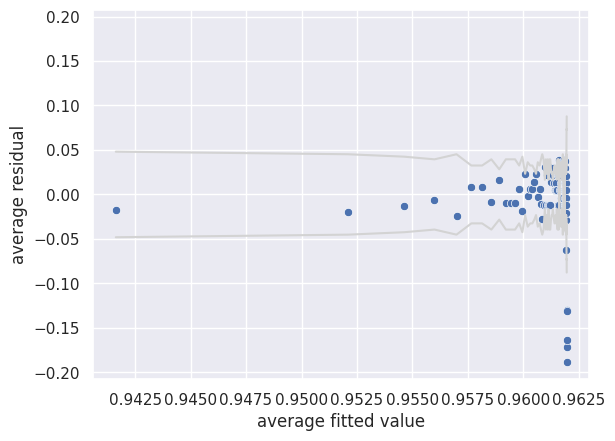

In [187]:
results_a.plot_residuals()

In [188]:
results_b = reg.logistic(data=data_df, formula='recommended ~ received_for_free')
results_b.micro_summary()

Optimization terminated successfully.
         Current function value: 0.159269
         Iterations 8


variable,coefficient,std error,p-value
received_for_free[T.True],1.496393,0.144388,0.000000


69.17% of average residuals inside


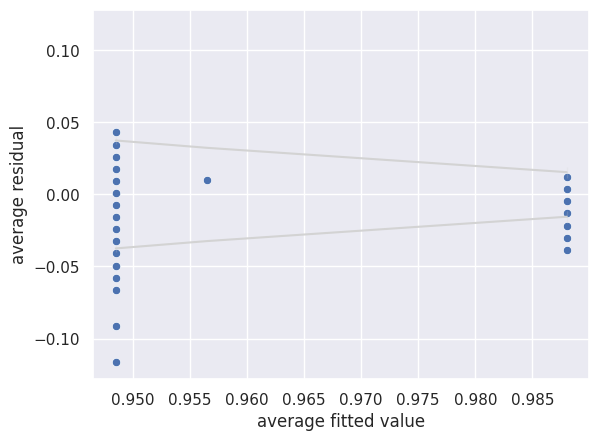

In [189]:
results_b.plot_residuals()

In [190]:
results_c = reg.linear(data=data_df, formula='np.log(author_num_reviews) ~ periphery')
results_c.micro_summary()

variable,coefficient,std error,p-value
periphery,-0.130637,0.019719,0.000000


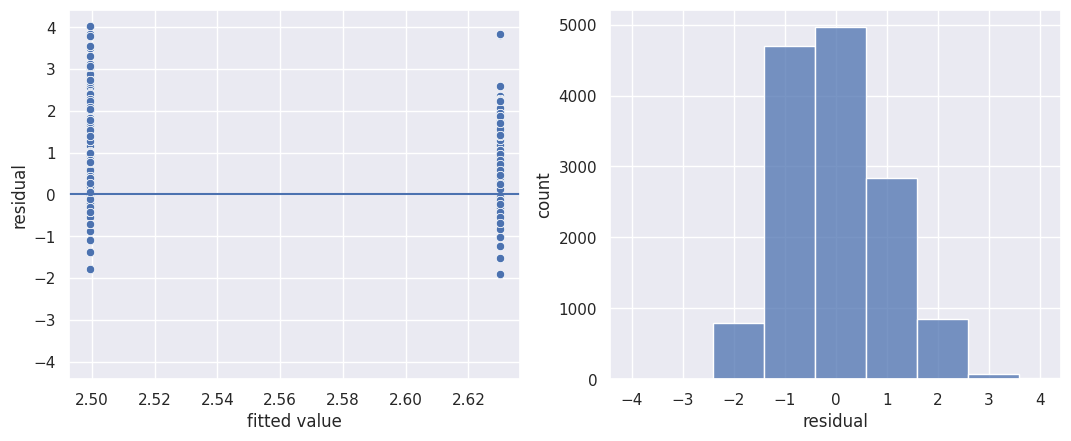

In [191]:
results_c.plot_residuals()

In [192]:
results_d = reg.linear(data=data_df, formula='np.log(author_num_reviews) ~ coreness')
results_d.micro_summary()

variable,coefficient,std error,p-value
coreness,0.130637,0.019719,0.000000


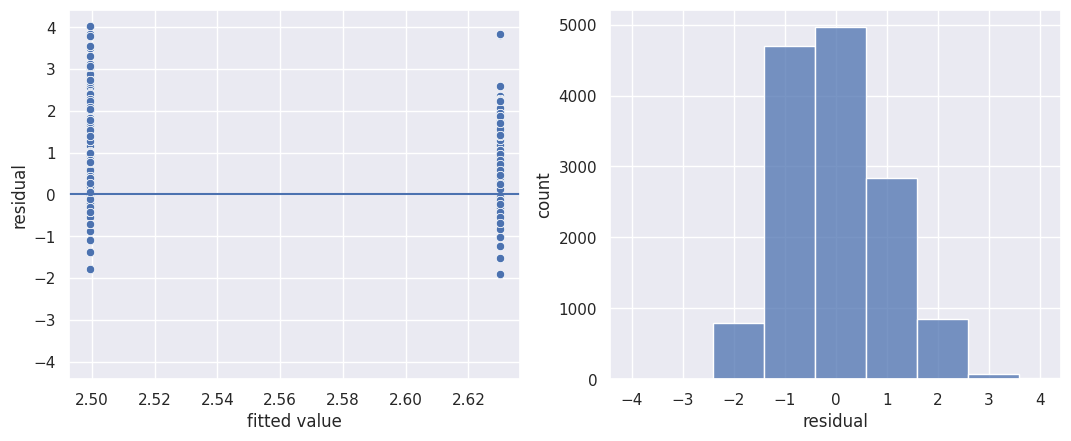

In [193]:
results_d.plot_residuals()

In [194]:
results_e = reg.logistic(data=data_df, formula='recommended ~ author_playtime_forever + received_for_free')
results_e.micro_summary()

Optimization terminated successfully.
         Current function value: 0.159156
         Iterations 8


variable,coefficient,std error,p-value
received_for_free[T.True],1.501593,0.144452,0.000000
author_playtime_forever,-0.000003,0.000002,0.051429


72.5% of average residuals inside


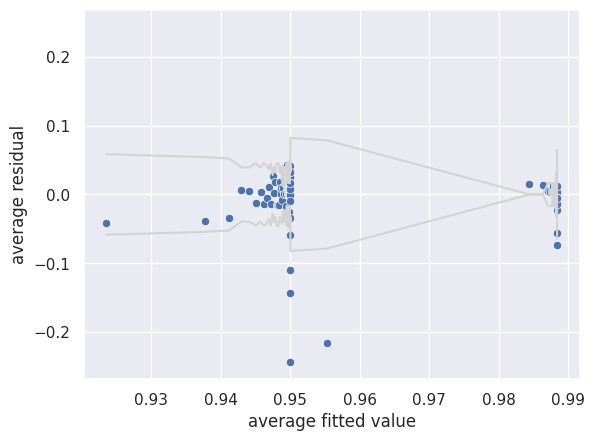

In [195]:
results_e.plot_residuals()

In [196]:
results_f = reg.linear(data=data_df, formula='np.log(author_num_reviews) ~ coreness + periphery')
results_f.micro_summary()

variable,coefficient,std error,p-value
coreness,31453305092.199707,2193994463670.797119,0.988562
periphery,31453305092.032471,2193994463670.798584,0.988562


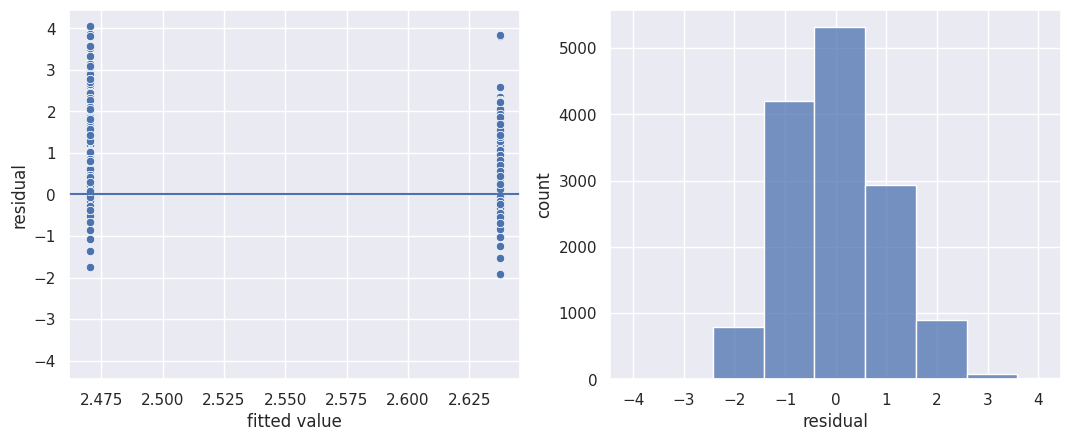

In [197]:
results_f.plot_residuals()

In [198]:
results_g = reg.logistic(data=data_df, formula='coreness ~ np.log(author_playtime_forever)')
results_g.micro_summary()

Optimization terminated successfully.
         Current function value: 0.551755
         Iterations 5


variable,coefficient,std error,p-value
np.log(author_playtime_forever),0.140952,0.011639,0.000000


87.5% of average residuals inside


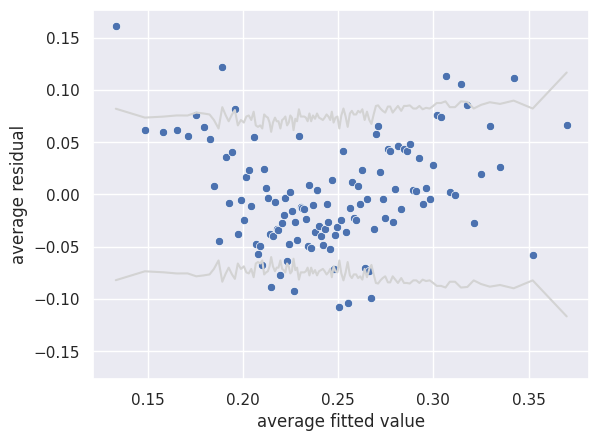

In [199]:
results_g.plot_residuals()

In [200]:
data_df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness,periphery
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,1,0,0,...,76561198074616040,148,12,29259,0.0,18588.0,1.597875e+09,1.0,0,1
1,268500,XCOM 2,73193028,brazilian,"While i did not play the Vanilla game, War of ...",2020-07-24 04:42:09,2020-07-24 04:42:09,1,0,0,...,76561198074616040,148,12,9464,0.0,9251.0,1.596595e+09,1.0,0,1
2,292030,The Witcher 3: Wild Hunt,73557216,brazilian,A Mona Lisa dos jogos.,2020-07-31 11:41:40,2020-07-31 11:41:40,1,1,0,...,76561198140909430,75,14,25779,0.0,25779.0,1.592863e+09,1.0,1,0
3,381210,Dead by Daylight,73557284,brazilian,"Bom demais. ""Depois de um tempo você para de l...",2020-07-31 11:43:25,2020-07-31 11:43:25,1,1,0,...,76561198140909430,74,14,21709,41.0,16187.0,1.610659e+09,1.0,1,0
4,242760,The Forest,73557449,brazilian,Um dos melhores jogos de sobrevivência que jog...,2020-07-31 11:49:38,2020-07-31 11:49:38,1,0,0,...,76561198140909430,74,14,11086,0.0,11086.0,1.574923e+09,1.0,1,0


In [201]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14232 entries, 0 to 14231
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          14232 non-null  int64  
 1   app_name                        14232 non-null  object 
 2   review_id                       14232 non-null  int64  
 3   language                        14232 non-null  object 
 4   review                          14222 non-null  object 
 5   timestamp_created               14232 non-null  object 
 6   timestamp_updated               14232 non-null  object 
 7   recommended                     14232 non-null  int64  
 8   votes_helpful                   14232 non-null  int64  
 9   votes_funny                     14232 non-null  int64  
 10  weighted_vote_score             14232 non-null  float64
 11  comment_count                   14232 non-null  int64  
 12  steam_purchase                  

In [202]:
# create column not recommended
data_df['not_recommended'] = 1 - data_df['recommended']

In [203]:
# get app_name of most received_for_free and fewer recommended
data_df.groupby('app_name')['received_for_free', 'not_recommended'].sum().sort_values(ascending=False, by='not_recommended').head(10)

/tmp/ipykernel_12/2931806284.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_df.groupby('app_name')['received_for_free', 'not_recommended'].sum().sort_values(ascending=False, by='not_recommended').head(10)


,received_for_free,not_recommended
app_name,,
PLAYERUNKNOWN'S BATTLEGROUNDS,88,107
Grand Theft Auto V,155,49
Rust,13,43
Dead by Daylight,20,29
ARK: Survival Evolved,127,26
Rocket League,215,24
Terraria,146,14
Garry's Mod,99,13
DARK SOULS™ III,28,12


- Filtar dataset por app_name = 'PLAYERUNKNOWN'S BATTLEGROUNDS'

In [204]:
data_df_jogo_filtrado = data_df[data_df['app_name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS"]
data_df_jogo_filtrado.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness,periphery,not_recommended
29,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,53116646,brazilian,Sem igual... Melhor jogo atualmente!,2019-07-02 10:12:50,2019-07-02 10:12:50,1,0,0,...,53,12,19109,0.0,12192.0,1.606317e+09,1.0,1,0,0
119,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72963881,brazilian,Pubg lite é de graça,2020-07-19 19:03:40,2020-07-19 19:03:40,1,0,1,...,291,33,5741,0.0,5734.0,1.598924e+09,1.0,0,1,0
186,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72666242,brazilian,jogo morto e cansado,2020-07-14 10:07:20,2020-07-14 10:07:20,1,1,0,...,24,13,8888,0.0,8888.0,1.556746e+09,1.0,0,1,0
254,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72399494,brazilian,vicio,2020-07-10 00:01:38,2020-07-10 00:01:38,1,0,0,...,30,6,7089,0.0,5553.0,1.609563e+09,1.0,0,1,0
331,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72727930,brazilian,Bom mas prefiro o lite,2020-07-15 11:49:50,2020-07-15 11:49:50,1,0,0,...,110,13,4336,0.0,4336.0,1.594220e+09,1.0,1,0,0


In [205]:
data_df_jogo_filtrado_horas = data_df_jogo_filtrado[data_df_jogo_filtrado['author_playtime_last_two_weeks'] < 2]
data_df_jogo_filtrado_horas.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness,periphery,not_recommended
29,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,53116646,brazilian,Sem igual... Melhor jogo atualmente!,2019-07-02 10:12:50,2019-07-02 10:12:50,1,0,0,...,53,12,19109,0.0,12192.0,1.606317e+09,1.0,1,0,0
119,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72963881,brazilian,Pubg lite é de graça,2020-07-19 19:03:40,2020-07-19 19:03:40,1,0,1,...,291,33,5741,0.0,5734.0,1.598924e+09,1.0,0,1,0
186,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72666242,brazilian,jogo morto e cansado,2020-07-14 10:07:20,2020-07-14 10:07:20,1,1,0,...,24,13,8888,0.0,8888.0,1.556746e+09,1.0,0,1,0
254,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72399494,brazilian,vicio,2020-07-10 00:01:38,2020-07-10 00:01:38,1,0,0,...,30,6,7089,0.0,5553.0,1.609563e+09,1.0,0,1,0
331,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,72727930,brazilian,Bom mas prefiro o lite,2020-07-15 11:49:50,2020-07-15 11:49:50,1,0,0,...,110,13,4336,0.0,4336.0,1.594220e+09,1.0,1,0,0


In [206]:
data_df_jogo_filtrado_horas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 29 to 13742
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          389 non-null    int64  
 1   app_name                        389 non-null    object 
 2   review_id                       389 non-null    int64  
 3   language                        389 non-null    object 
 4   review                          389 non-null    object 
 5   timestamp_created               389 non-null    object 
 6   timestamp_updated               389 non-null    object 
 7   recommended                     389 non-null    int64  
 8   votes_helpful                   389 non-null    int64  
 9   votes_funny                     389 non-null    int64  
 10  weighted_vote_score             389 non-null    float64
 11  comment_count                   389 non-null    int64  
 12  steam_purchase                  3

In [207]:
results_b_recorte_1 = reg.logistic(data=data_df_jogo_filtrado_horas, formula='recommended ~ received_for_free')
results_b_recorte_1.micro_summary()

Optimization terminated successfully.
         Current function value: 0.536852
         Iterations 7


variable,coefficient,std error,p-value
received_for_free[T.True],2.312235,0.602319,0.000124


80.95% of average residuals inside


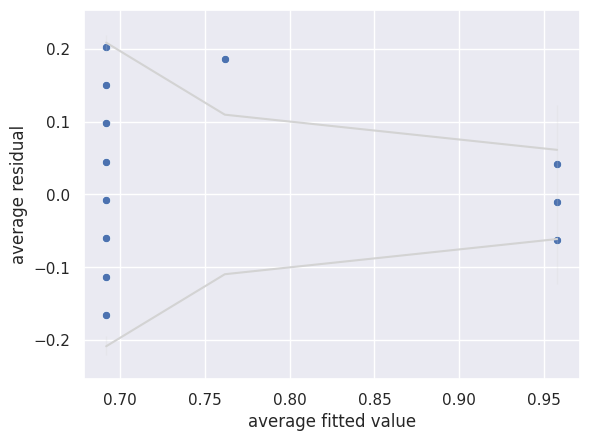

In [208]:
results_b_recorte_1.plot_residuals()

In [209]:
# provar que não é preciso ter muitas horas jogadas para ter coreness 1 do data_df
data_df['coreness'].value_counts()

0    10742
1     3490
Name: coreness, dtype: int64

In [227]:
data_df['author_playtime_forever'].value_counts(
    sort=True, ascending=False, bins=10, normalize=False, dropna=True
)

(-594.332, 59938.1]     13835
(59938.1, 119871.2]       295
(119871.2, 179804.3]       74
(179804.3, 239737.4]       19
(239737.4, 299670.5]        4
(299670.5, 359603.6]        2
(419536.7, 479469.8]        1
(479469.8, 539402.9]        1
(539402.9, 599336.0]        1
(359603.6, 419536.7]        0
Name: author_playtime_forever, dtype: int64

In [243]:
data_df_horas = data_df[data_df['author_playtime_forever'] > 1000]
data_df_horas.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,level_of_positivite,coreness,periphery,not_recommended
0,292030,The Witcher 3: Wild Hunt,73579864,brazilian,"I'll only speak about performance, since we al...",2020-07-31 22:19:22,2020-07-31 22:19:22,1,0,0,...,148,12,29259,0.0,18588.0,1.597875e+09,1.0,0,1,0
1,268500,XCOM 2,73193028,brazilian,"While i did not play the Vanilla game, War of ...",2020-07-24 04:42:09,2020-07-24 04:42:09,1,0,0,...,148,12,9464,0.0,9251.0,1.596595e+09,1.0,0,1,0
2,292030,The Witcher 3: Wild Hunt,73557216,brazilian,A Mona Lisa dos jogos.,2020-07-31 11:41:40,2020-07-31 11:41:40,1,1,0,...,75,14,25779,0.0,25779.0,1.592863e+09,1.0,1,0,0
3,381210,Dead by Daylight,73557284,brazilian,"Bom demais. ""Depois de um tempo você para de l...",2020-07-31 11:43:25,2020-07-31 11:43:25,1,1,0,...,74,14,21709,41.0,16187.0,1.610659e+09,1.0,1,0,0
4,242760,The Forest,73557449,brazilian,Um dos melhores jogos de sobrevivência que jog...,2020-07-31 11:49:38,2020-07-31 11:49:38,1,0,0,...,74,14,11086,0.0,11086.0,1.574923e+09,1.0,1,0,0


In [244]:
data_df_horas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10038 entries, 0 to 14231
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          10038 non-null  int64  
 1   app_name                        10038 non-null  object 
 2   review_id                       10038 non-null  int64  
 3   language                        10038 non-null  object 
 4   review                          10034 non-null  object 
 5   timestamp_created               10038 non-null  object 
 6   timestamp_updated               10038 non-null  object 
 7   recommended                     10038 non-null  int64  
 8   votes_helpful                   10038 non-null  int64  
 9   votes_funny                     10038 non-null  int64  
 10  weighted_vote_score             10038 non-null  float64
 11  comment_count                   10038 non-null  int64  
 12  steam_purchase                  

In [245]:
# ver dispersão de author_num_games_owned do data_df
data_df['author_num_games_owned'].value_counts(
    sort=True, ascending=False, bins=10, normalize=False, dropna=True
)

(-9.833, 983.2]     14014
(983.2, 1966.4]       176
(1966.4, 2949.6]       30
(2949.6, 3932.8]        5
(8848.8, 9832.0]        3
(4916.0, 5899.2]        2
(5899.2, 6882.4]        2
(3932.8, 4916.0]        0
(6882.4, 7865.6]        0
(7865.6, 8848.8]        0
Name: author_num_games_owned, dtype: int64

In [254]:
data_df_qte_jogos_e_horas = data_df_horas[data_df_horas['author_num_games_owned'] < 3]
data_df_qte_jogos_e_horas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 3470 to 11676
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   app_id                          15 non-null     int64  
 1   app_name                        15 non-null     object 
 2   review_id                       15 non-null     int64  
 3   language                        15 non-null     object 
 4   review                          15 non-null     object 
 5   timestamp_created               15 non-null     object 
 6   timestamp_updated               15 non-null     object 
 7   recommended                     15 non-null     int64  
 8   votes_helpful                   15 non-null     int64  
 9   votes_funny                     15 non-null     int64  
 10  weighted_vote_score             15 non-null     float64
 11  comment_count                   15 non-null     int64  
 12  steam_purchase                  

In [255]:
results_g_recorte_2 = reg.logistic(data=data_df_qte_jogos_e_horas, formula='coreness ~ np.log(author_playtime_forever)')
results_g_recorte_2.micro_summary()

Optimization terminated successfully.
         Current function value: 0.597001
         Iterations 5


variable,coefficient,std error,p-value
np.log(author_playtime_forever),0.580320,0.549649,0.291059


80.0% of average residuals inside


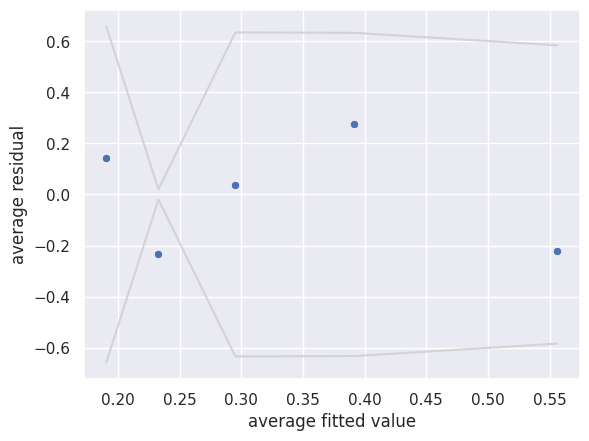

In [256]:
results_g_recorte_2.plot_residuals()